In [24]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
epoch = 5
batch = 64

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_conv_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_conv_train = x_conv_train.astype('float32') / 255

x_conv_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
x_conv_test = x_conv_test.astype('float32') / 255

In [6]:
x_dense_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_dense_train = x_dense_train.astype('float32') / 255

x_dense_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_dense_test = x_dense_test.astype('float32') / 255

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [35]:
def build_model_densely(shape):
    network = models.Sequential()
    network.add(layers.Dense(512, activation = 'relu', input_shape = (shape,)))
    network.add(layers.Dense(10, activation = 'softmax'))
    network.summary()
    return network

In [36]:
def build_model_conv(shape):
    network = models.Sequential()
    network.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = shape))
    network.add(layers.MaxPooling2D((2, 2)))
    network.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = shape))
    network.add(layers.MaxPooling2D((2, 2)))
    network.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    network.add(layers.Flatten())
    network.add(layers.Dense(64, activation = 'relu'))
    network.add(layers.Dense(10, activation = 'softmax'))
    network.summary()
    return network

In [37]:
def run_model(network, train_x, train_y, e, b):
    network.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['acc']
    )
    history = network.fit(
        train_x, train_y,
        epochs = e,
        batch_size = b
    )
    return history

In [38]:
dense_net = build_model_densely(x_dense_train.shape[1])
dense_his = run_model(dense_net, x_dense_train, y_train, epoch, batch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.2281 - acc: 0.9352
Epoch 2/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.0889 - acc: 0.9740
Epoch 3/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.0565 - acc: 0.9830
Epoch 4/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.0389 - acc: 0.9881
Epoch 5/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.0282 - acc: 0.9917


In [39]:
conv_net = build_model_conv((x_conv_train.shape[1], x_conv_train.shape[2], 1))
conv_his = run_model(conv_net, x_conv_train, y_train, epoch, batch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                36928     
__________

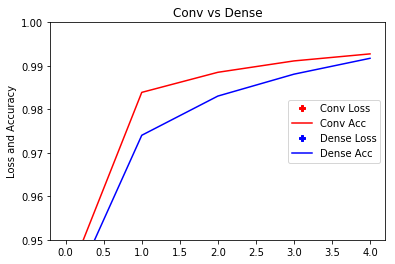

In [40]:
x = range(epoch)
plt.clf()
plt.plot(x, conv_his.history['loss'], 'rP', label = 'Conv Loss')
plt.plot(x, conv_his.history['acc'], 'r', label = 'Conv Acc')
plt.plot(x, dense_his.history['loss'], 'bP', label = 'Dense Loss')
plt.plot(x, dense_his.history['acc'], 'b', label = 'Dense Acc')
plt.title('Conv vs Dense')
plt.ylabel('Loss and Accuracy')
plt.legend(loc = 'center right')
plt.ylim((0.95, 1.0))

plt.show()

In [41]:
conv_loss, conv_acc = conv_net.evaluate(x_conv_test, y_test)
print("Conv Loss : ", conv_loss, "\tConv Acc : ", conv_acc)

10000/10000 [==============================] - 3s 270us/step
Conv Loss :  0.03748118642807822 	Conv Acc :  0.9878


In [42]:
dense_loss, dense_acc = dense_net.evaluate(x_dense_test, y_test)
print("Dense Loss : ", dense_loss, "\tDense Acc : ", dense_acc)

10000/10000 [==============================] - 1s 61us/step
Dense Loss :  0.0597078202982957 	Dense Acc :  0.9811
